Shape of labelled image 2
   Original Image  Pixel  Rev_Pix  Canny Edge  Roberts  Sobel  Scharr  \
0               0      0    36607           0      0.0    0.0     0.0   
1               0      1    36606           0      0.0    0.0     0.0   
2               0      2    36605           0      0.0    0.0     0.0   
3               0      3    36604           0      0.0    0.0     0.0   
4               0      4    36603           0      0.0    0.0     0.0   

   Prewitt  Gaussian s3  Gaussian s7  Median s3  Variance s3  Labels  
0      0.0            0            0          0            0       0  
1      0.0            0            0          0            0       0  
2      0.0            0            0          0            0       0  
3      0.0            0            0          0            0       0  
4      0.0            0            0          0            0       0  
Accuracy on training data =  0.9999658539916684
Accuracy =  0.6580169352635892
Rev_Pix           0.126662
Pix

<Figure size 216x288 with 0 Axes>

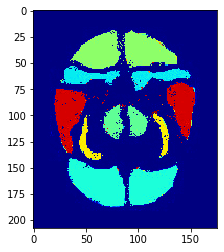

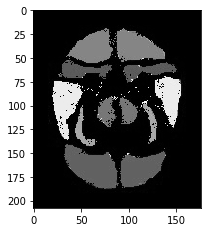

<Figure size 216x288 with 0 Axes>

In [ ]:
import numpy as np
import cv2
import pandas as pd
from sklearn.linear_model import LogisticRegression
 

img = cv2.imread('/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem0.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  


#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Pixel number 
a = []
for i in range(0,36608):
 a.append(i)
df['Pixel'] = a

#Rev_pix number 
a.reverse()
df['Rev_Pix'] = a

                
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe


######################################                

#Now, add a column in the data frame for the Labels
labeled_img = cv2.imread('/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/gives orange temporal lobes no b.jpg')                                        #--------------            ----  --------  -----

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
print("Shape of labelled image",len(labeled_img.shape))
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

print(df.head())

#df.to_csv("Gabor.csv")


#########################################################

#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)


model.fit(X_train, y_train)

prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)

from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))



importances = list(model.feature_importances_)

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

print(X.columns)

result = model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')
plt.figure(figsize=(3,4))
#plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')

segmented = result.reshape((img.shape))
plt.imshow(segmented, cmap ='gray')
plt.figure(figsize=(3,4))





In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


['nonDem2.jpg', 'nonDem3.jpg', 'nonDem1.jpg', 'nonDem0.jpg', 'nonDem4.jpg', 'nonDem5.jpg']
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem2.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem3.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem1.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem0.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem4.jpg
/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/nonDem5.jpg






/Users/parth.bhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/parth.bhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/parth.bhs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To co

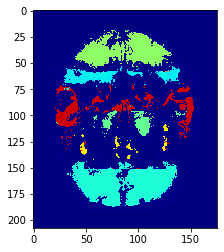

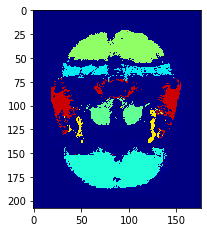

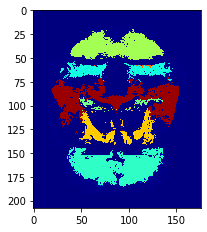

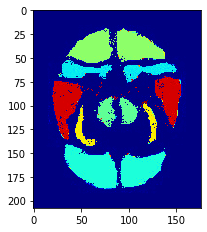

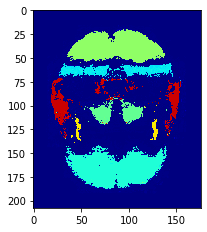

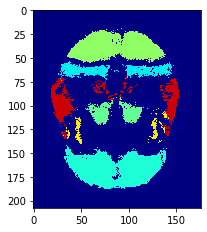

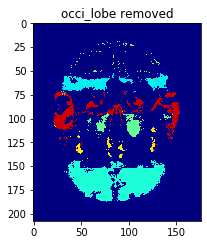

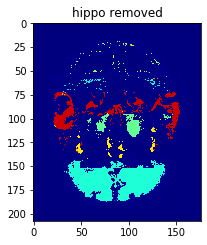

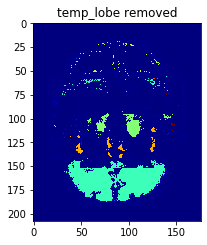

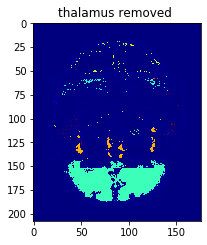

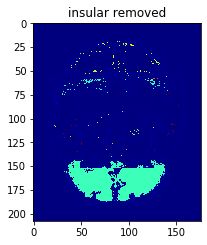

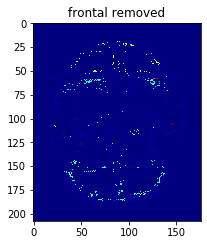

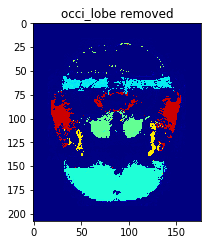

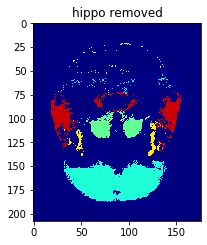

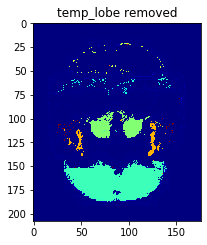

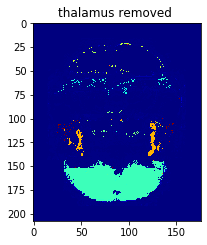

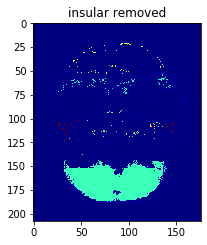

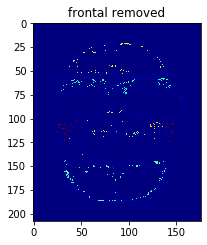

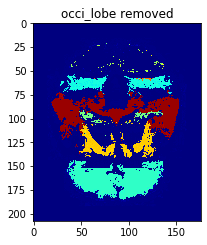

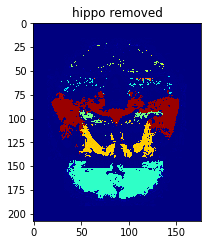

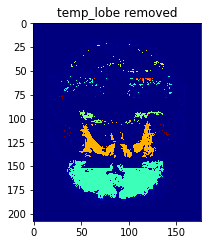

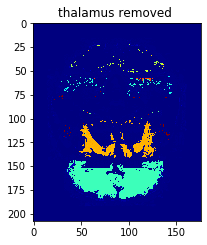

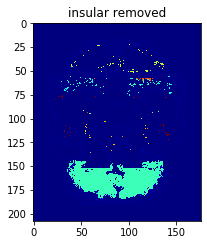

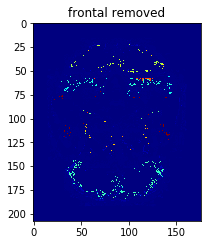

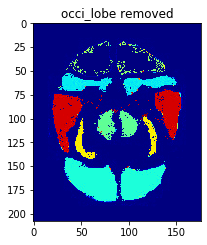

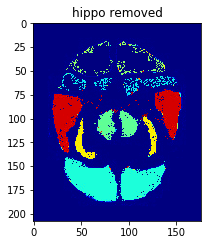

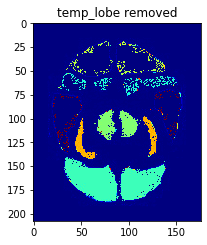

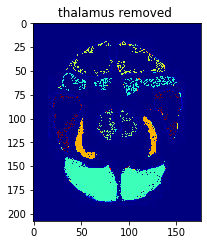

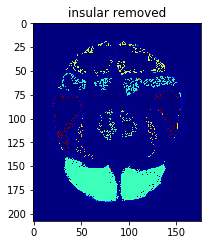

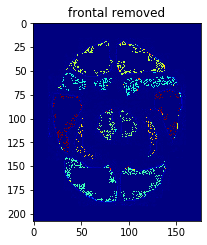

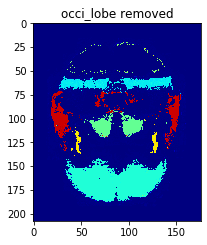

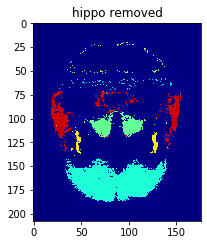

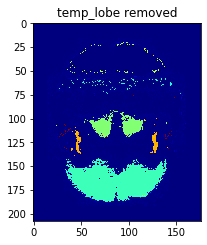

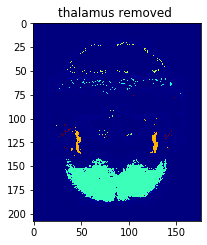

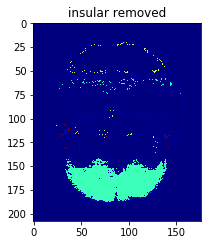

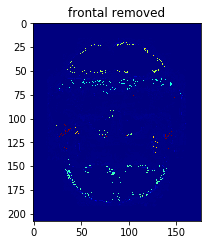

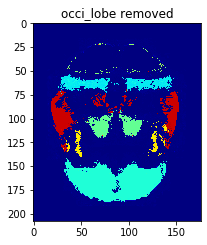

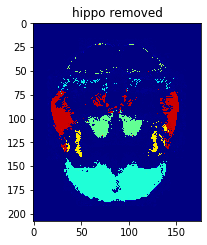

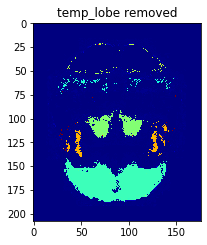

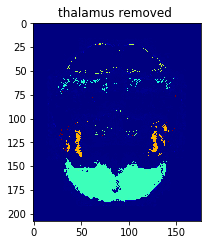

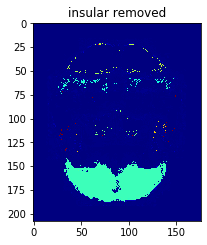

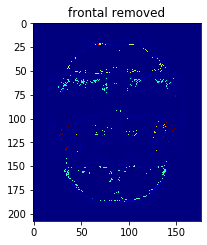

<Figure size 216x288 with 0 Axes>

In [ ]:
def rf_map(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
  #Save original image pixels into a data frame. This is our Feature #1.
  img2 = img.reshape(-1)
  df = pd.DataFrame()
  df['Original Image'] = img2

#Pixel number 
  a = []
  for i in range(0,36608):
   a.append(i)  
  df['Pixel'] = a

#Rev_pix number 
  a.reverse()
  df['Rev_Pix'] = a

                
#CANNY EDGE
  edges = cv2.Canny(img, 100,200)   #Image, min and max values
  edges1 = edges.reshape(-1)
  df['Canny Edge'] = edges1 #Add column to original dataframe

  from skimage.filters import roberts, sobel, scharr, prewitt

  #ROBERTS EDGE
  edge_roberts = roberts(img)
  edge_roberts1 = edge_roberts.reshape(-1)
  df['Roberts'] = edge_roberts1

#SOBEL
  edge_sobel = sobel(img)
  edge_sobel1 = edge_sobel.reshape(-1)
  df['Sobel'] = edge_sobel1

#SCHARR
  edge_scharr = scharr(img)
  edge_scharr1 = edge_scharr.reshape(-1)
  df['Scharr'] = edge_scharr1

#PREWITT
  edge_prewitt = prewitt(img)
  edge_prewitt1 = edge_prewitt.reshape(-1)
  df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
  from scipy import ndimage as nd
  gaussian_img = nd.gaussian_filter(img, sigma=3)
  gaussian_img1 = gaussian_img.reshape(-1)
  df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
  gaussian_img2 = nd.gaussian_filter(img, sigma=7)
  gaussian_img3 = gaussian_img2.reshape(-1)
  df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
  median_img = nd.median_filter(img, size=3)
  median_img1 = median_img.reshape(-1)
  df['Median s3'] = median_img1

#VARIANCE with size=3
  variance_img = nd.generic_filter(img, np.var, size=3)
  variance_img1 = variance_img.reshape(-1)
  df['Variance s3'] = variance_img1  #Add column to original dataframe
 
  result = model.predict(df)
  segmented = result.reshape((img.shape))
  plt.imshow(segmented,cmap='jet')
  plt.figure(figsize=(3,4))
  return segmented



def temp_lobe(image):
  live =0;
  for x in range(0,208):
    for y in range(0,176):
      if(image[x,y]>=216 and image[x,y]<=236):
        live=live+1
        image[x,y]=0
  plt.title('temp_lobe removed')
  plt.imshow(image,cmap='jet')
  plt.figure(figsize=(3,4))
  return live



def insular(image):
  live =0;
  for x in range(0,208):
    for y in range(0,176):
      if(image[x,y]>=152 and image[x,y]<=162):
        live=live+1
        image[x,y]=0
  plt.title('insular removed')
  plt.imshow(image,cmap='jet')
  plt.figure(figsize=(3,4))
  return live

def occi_lobe(image):
  live =0;
  for x in range(0,208):
    for y in range(0,176):
      if(image[x,y]>=121 and image[x,y]<=125):
        live=live+1
        image[x,y]=0
  plt.title('occi_lobe removed')
  plt.imshow(image,cmap='jet')
  plt.figure(figsize=(3,4))
  return live


def thalamus(image):
  live =0;
  for x in range(0,208):
    for y in range(0,176):
      if(image[x,y]>=108 and image[x,y]<=114):
        live=live+1
        image[x,y]=0
  plt.title('thalamus removed ')
  plt.imshow(image,cmap='jet')
  plt.figure(figsize=(3,4))
  return live


def hippo(image):
  live =0;
  for x in range(0,208):
    for y in range(0,176):
      if(image[x,y]>=82 and image[x,y]<=86):
        live=live+1
        image[x,y]=0
  plt.title('hippo removed')
  plt.imshow(image,cmap='jet')
  plt.figure(figsize=(3,4))
  return live


def frontal(image):
  live =0;
  for x in range(0,208):
    for y in range(0,176):
      if(image[x,y]>=89 and image[x,y]<=92):
        live=live+1
        image[x,y]=0
  plt.title('frontal removed')
  plt.imshow(image,cmap='jet')
  plt.figure(figsize=(3,4))
  return live


import os
i=0;
path = '/Users/parth.bhs/Google Drive/Project - ALz/Used data set alz/ND-5/'
data = os.listdir(path)
print(data)
dset = {}

for x in data:
      if not x.startswith('.'):
          print(path+x)
          img = cv2.imread(path+x)  
          dset[i] = rf_map(img)  
          i=i+1;   
#dset = img,thresh,im1,brain_out=seg()
i=0;
import csv 
with open('test_randf.csv',mode ='w') as f:
  fieldnames=['File_name','Occi','Hippo','Temporal','Thalmus','Insular', 'Frontal lobe','Alz']
  thewriter=csv.DictWriter(f,fieldnames=fieldnames)
  thewriter.writeheader() 
  writer = csv.writer(f,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL) #imp. 
  for x in data :
    if not x.startswith('.'):
        writer.writerow([x,occi_lobe(dset[i]),hippo(dset[i]),temp_lobe(dset[i]),thalamus(dset[i]),insular(dset[i]),frontal(dset[i]),'1'])  
        i=i+1;
        print("\n")




In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
